**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/binary-classification).**

---


# Introduction #

In this exercise, you'll build a model to predict hotel cancellations with a binary classifier.

In [ ]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

First, load the *Hotel Cancellations* dataset.

In [ ]:
hotel = pd.read_csv('hotel_bookings.csv')

X = hotel.copy()
y = X.pop('is_canceled')

In [ ]:
X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Define Model #

Now create a model with three hidden layers, each having 512 units and the ReLU activation. Be sure to include an output layer of one unit and sigmoid, and also `input_shape` as an argument to the first layer.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = 

# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and binary_accuracy metric.

In [ ]:
# YOUR CODE HERE


Finally, run this cell to train the model and view the learning curves.

Epoch 1/15
175/175 [==============================] - 3s 16ms/step - loss: 0.4318 - binary_accuracy: 0.7961 - val_loss: 0.3975 - val_binary_accuracy: 0.8180
Epoch 2/15
175/175 [==============================] - 2s 13ms/step - loss: 0.3869 - binary_accuracy: 0.8193 - val_loss: 0.3813 - val_binary_accuracy: 0.8244
Epoch 3/15
175/175 [==============================] - 2s 13ms/step - loss: 0.3729 - binary_accuracy: 0.8273 - val_loss: 0.3776 - val_binary_accuracy: 0.8285
Epoch 4/15
175/175 [==============================] - 2s 13ms/step - loss: 0.3633 - binary_accuracy: 0.8324 - val_loss: 0.3670 - val_binary_accuracy: 0.8324
Epoch 5/15
175/175 [==============================] - 2s 13ms/step - loss: 0.3550 - binary_accuracy: 0.8366 - val_loss: 0.3627 - val_binary_accuracy: 0.8331
Epoch 6/15
175/175 [==============================] - 2s 13ms/step - loss: 0.3467 - binary_accuracy: 0.8404 - val_loss: 0.3644 - val_binary_accuracy: 0.8320
Epoch 7/15
175/175 [==============================] - 2s 1

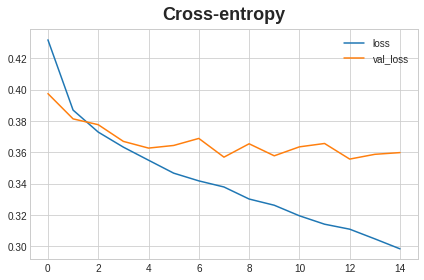

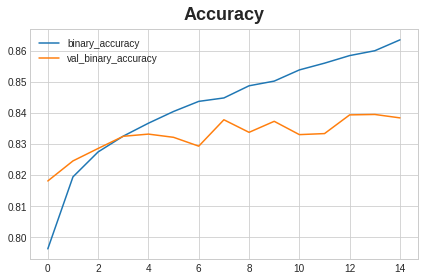

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=15
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# Conclusion #

Congratulations! You've completed Kaggle's *Introduction to Deep Learning* course!

With your new skills you're ready to take on more advanced applications like computer vision and sentiment classification. What would you like to do next?

Why not try one of our *Getting Started* competitions?

- Classify images with TPUs in [**Petals to the Metal**](https://www.kaggle.com/c/tpu-getting-started)
- Create art with GANs in [**I'm Something of a Painter Myself**](https://www.kaggle.com/c/gan-getting-started)
- Classify Tweets in [**Real or Not? NLP with Disaster Tweets**](https://www.kaggle.com/c/nlp-getting-started)
- Detect contradiction and entailment in [**Contradictory, My Dear Watson**](https://www.kaggle.com/c/contradictory-my-dear-watson)

Until next time, Kagglers!